## Loading Liabraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data

In [3]:
data = pd.read_csv('study_data.csv')
data = data[0:50]

#### Data Exploration

In [4]:
data.head()

,repetition_time,study_time,knowledge_level
0,0.00,0.00,Low
1,0.24,0.90,High
2,0.25,0.33,Low
3,0.98,0.24,Low
4,0.72,0.25,Low


In [5]:
data = data.drop(columns= 'knowledge_level')

In [6]:
data.head()

,repetition_time,study_time
0,0.00,0.00
1,0.24,0.90
2,0.25,0.33
3,0.98,0.24
4,0.72,0.25


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   repetition_time  50 non-null     float64
 1   study_time       50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


In [8]:
data.describe()

,repetition_time,study_time
count,50.000000,50.000000
mean,0.450000,0.435800
std,0.253014,0.294279
min,0.000000,0.000000
25%,0.255000,0.250000
50%,0.415000,0.290000
75%,0.717500,0.780000
max,0.980000,0.900000


### Plotting Data

Text(0, 0.5, 'study_time')

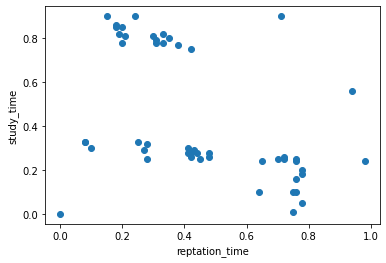

In [9]:
plt.scatter(data['repetition_time'],data['study_time'])
plt.xlabel('reptation_time')
plt.ylabel('study_time')

## Preparing Input data (Scaling_Data)

In [10]:
from sklearn.preprocessing import scale
data_scaled = data.copy()
data_scaled = scale(data)
data_scaled[0:5]

array([[-1.79661119, -1.4959405 ],
       [-0.83841856,  1.59342722],
       [-0.79849386, -0.36317234],
       [ 2.11600874, -0.67210911],
       [ 1.07796672, -0.6377828 ]])

# <font color = "red"> Elbow Method

In [11]:
from sklearn.cluster import KMeans

w=[]
# blank list for storing WCSS (within cluster sum of square)

for i in range(1,8):
    kmeans = KMeans(n_clusters= i , random_state= 0)
    kmeans.fit(data_scaled)
    w.append(kmeans.inertia_)
    # interia will calculate the sum of squared distances for each cluster

Text(0, 0.5, 'WCSS')

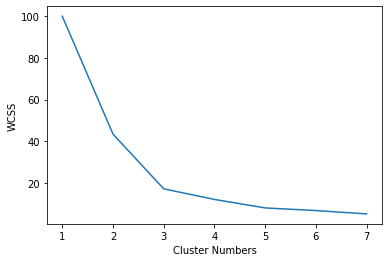

In [12]:
plt.plot(range(1,8), w)
plt.xlabel("Cluster Numbers")
plt.ylabel ("WCSS")

<font color = "red"> we are getting value 3 from elbow graph now we will berify the same from dindogram

# <font color = "red"> Dendogram

In [13]:
from scipy.cluster.hierarchy import dendrogram , linkage

In [14]:
z = linkage(data_scaled, method = 'ward')

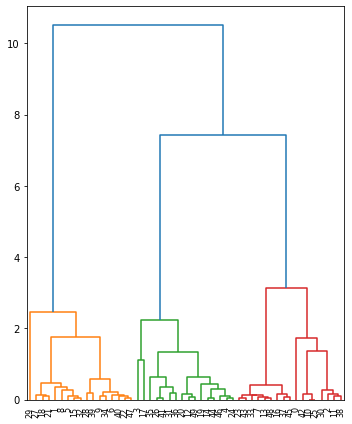

In [22]:
fig , ax = plt.subplots(figsize = (5,6))
ax = dendrogram(z)
plt.tight_layout()
plt.show()

<font color = "red"> Dadnogram gives 3 as answer and same given by elbow graph hence verified

# <font color = "green"> Agglomerative Clustering

## Traning Model

In [16]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
ag.fit(data_scaled)

AgglomerativeClustering(n_clusters=3)

In [17]:
cluster_data = data.copy()
cluster_data['cluster_pred'] = ag.fit_predict(data_scaled)

In [18]:
cluster_data.head()

,repetition_time,study_time,cluster_pred
0,0.00,0.00,0
1,0.24,0.90,1
2,0.25,0.33,0
3,0.98,0.24,2
4,0.72,0.25,2


## Clustering Labels

In [19]:
ag.labels_

array([0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 0, 2, 1, 0, 2, 1, 2, 2, 1,
       1, 0, 2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 1, 2, 0, 0,
       2, 0, 2, 1, 0, 2], dtype=int64)

# Visualization

<module 'matplotlib.pyplot' from 'C:\\Users\\featKARMA\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

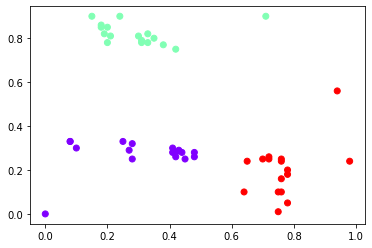

In [20]:
plt.scatter(data['repetition_time'],data['study_time'],c = cluster_data['cluster_pred'] , cmap= 'rainbow')
plt